# SUYASH PRATAP SINGH

## Description 


>This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over dollsr 50K  a year.


In [1]:
## import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
## load the dataset

df = pd.read_csv('adult.csv')
print("Read succesfully!")

Read succesfully!


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**From above dataframe we noticed that in the few columns we find '?' this has to removed** 

   i) First convert '?' into nan value
   
   
   ii) Then remove nan values

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df[df=='?']=np.nan


In [6]:
df=df.dropna(axis=0)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

* There is no nan values and no missing values in the given dataset

## Univariate analysis

In [10]:
df['age']

0        25
1        38
2        28
3        44
5        34
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 45222, dtype: int64

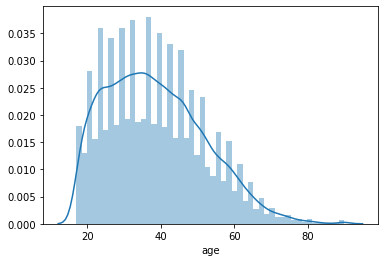

In [11]:
sns.distplot(df['age']);

* the above graph shows that dataset contains maximum people's range between 20-50 yrs

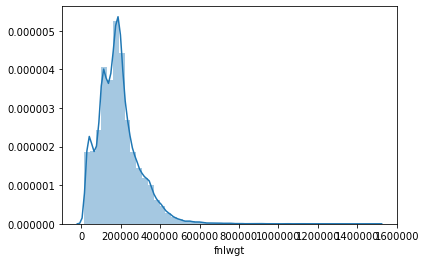

In [12]:
sns.distplot(df['fnlwgt']);

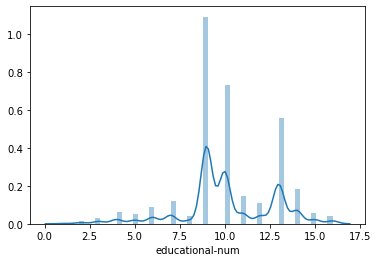

In [13]:
sns.distplot(df['educational-num'])

‘education.num’ is an ordinal representation of ‘education’, will be removing from df in future

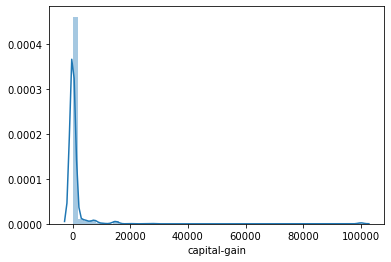

In [14]:
sns.distplot(df['capital-gain']);

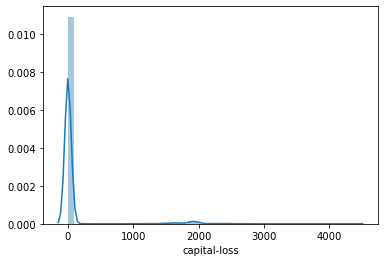

In [15]:
sns.distplot(df['capital-loss']);

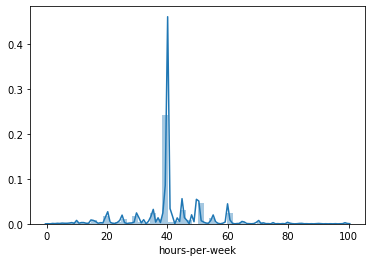

In [16]:
sns.distplot(df['hours-per-week']);

* The hours work for most of the people per week is 40hors

**The dependent column, ‘income’ which is to be predicted has been replaced with 0 and 1 and hence convert the problem to a dichotomous classification problem.**

In [17]:
df['income'].replace({'<=50K':0,'>50K':1},inplace=True)


In [18]:
import scipy.stats as stats
a=['age','capital-loss','capital-gain','hours-per-week','fnlwgt']
for i in a:
    #print(a)
    print(i,':',stats.pointbiserialr(df['income'],df[i])[0])


age : 0.2370402351236852
capital-loss : 0.14868698924704682
capital-gain : 0.22103380635450903
hours-per-week : 0.22719914201809321
fnlwgt : -0.007263912940610469


In [19]:
df=df.drop('fnlwgt',axis=1)


* ‘fnlwgt’ has been dropped which showed negative correlation.

In [20]:
df.drop('educational-num',axis=1,inplace=True)


In [21]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


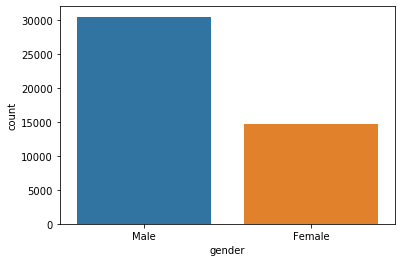

In [22]:

sns.countplot(df.gender);

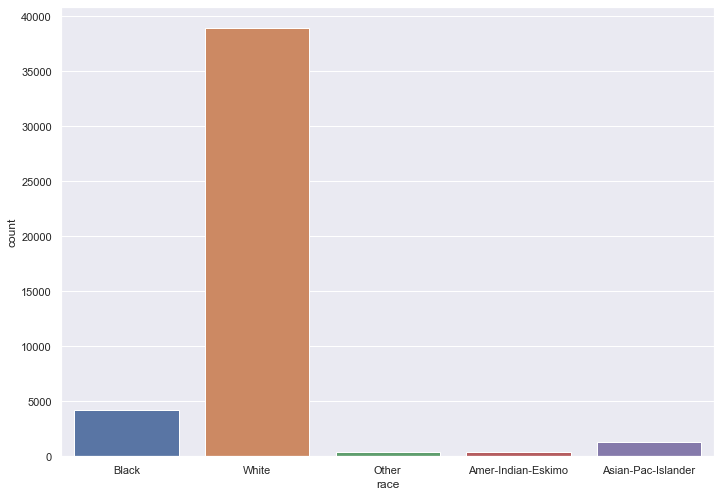

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df.race);

* From the above graph it is evident that there are more whites

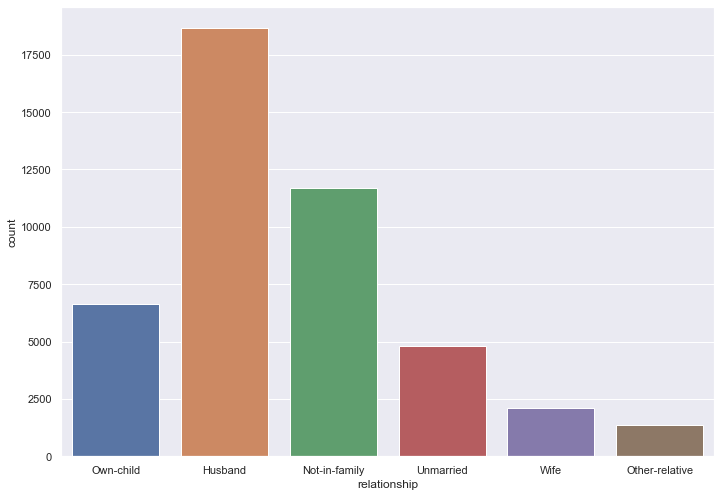

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df.relationship);

* Here we see frequency of husband is more

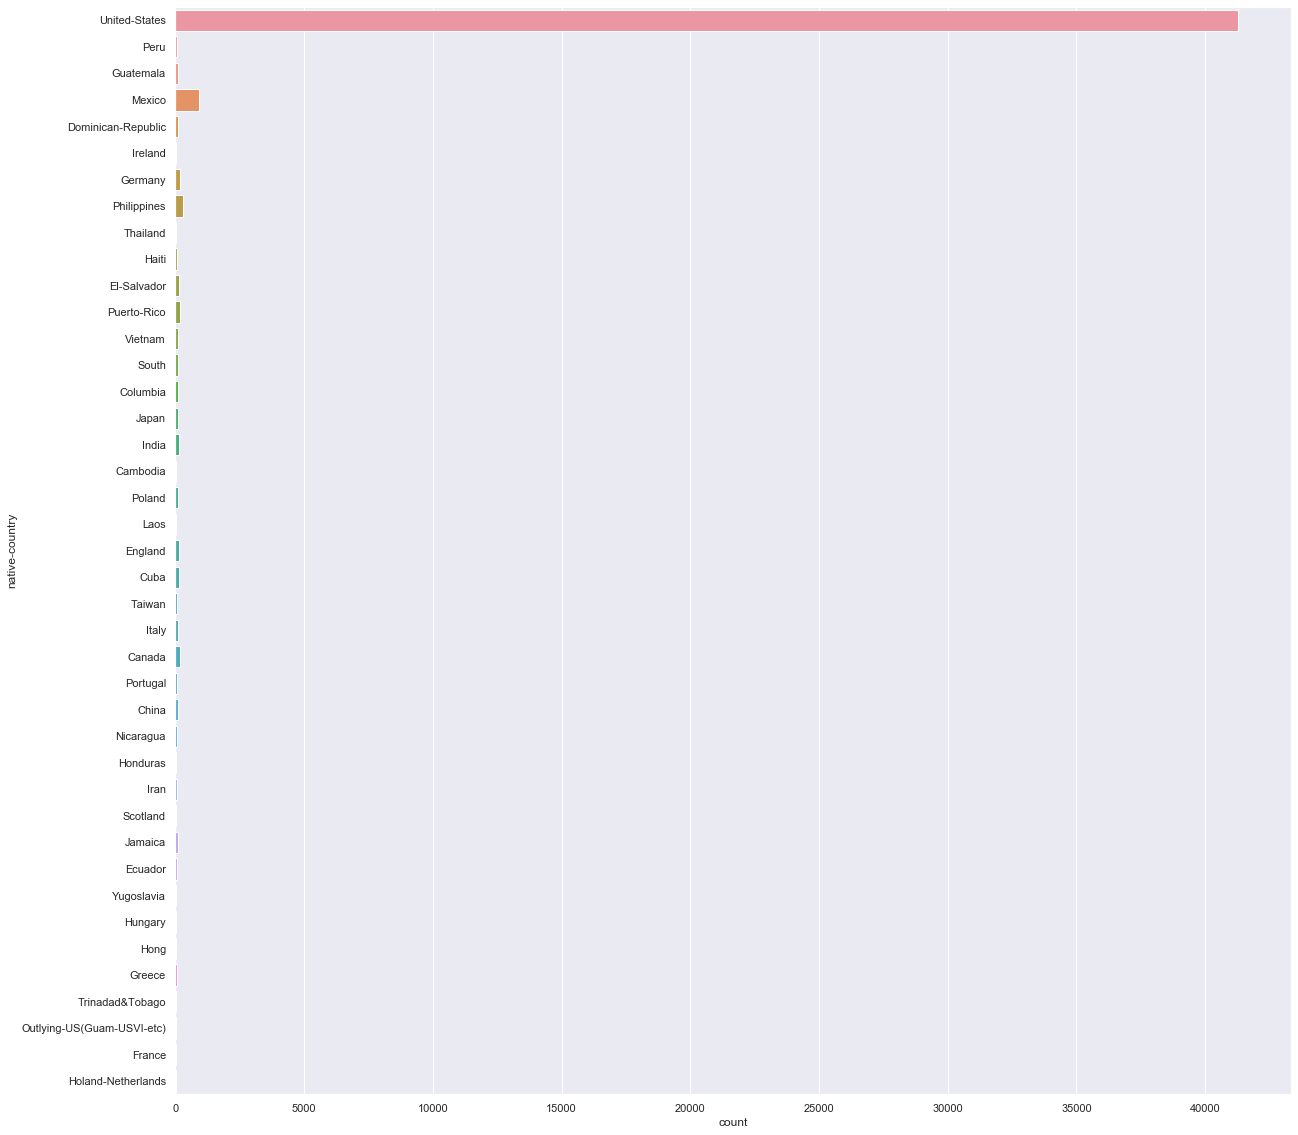

In [25]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(data = df, y = df['native-country']);

* It is evident that most pf the people's native is United States

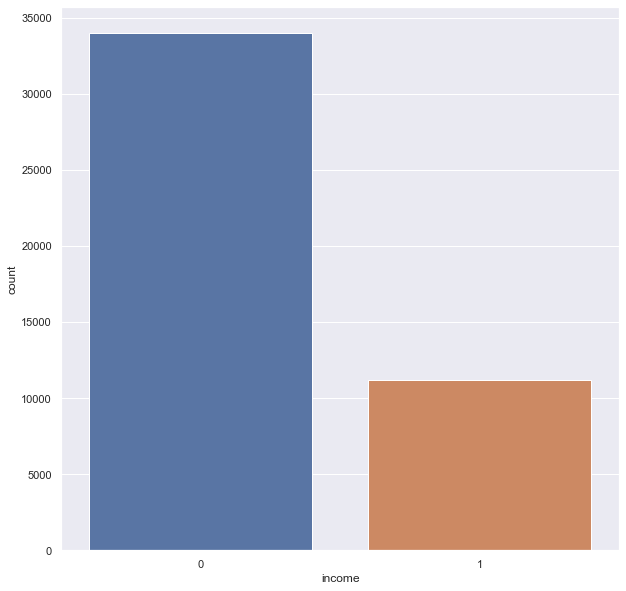

In [26]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(df['income']);

* '0' column represents salary <=50k
* '1' column represents salary >=50k

**From the graph we see the frequency of people erning <=50k is more**

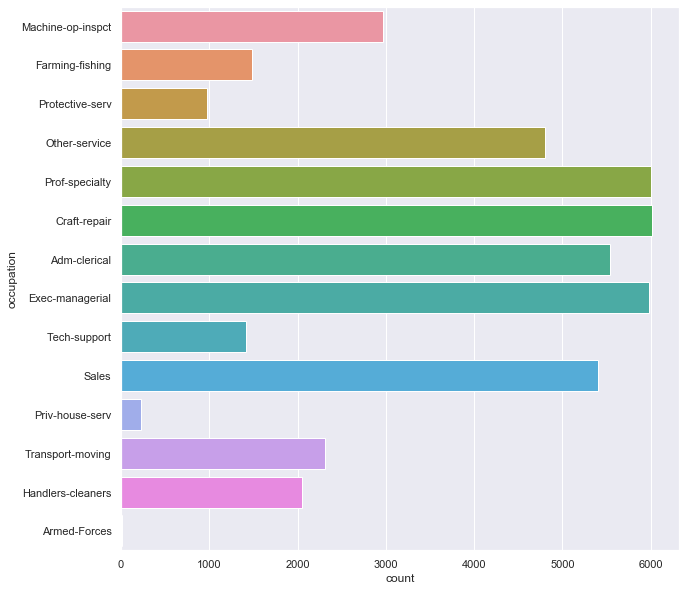

In [27]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = df['occupation']);

* from above graph we infer that occupation like prof-speciality,craft repair, exec-managerial has highest frequency followed by Sales

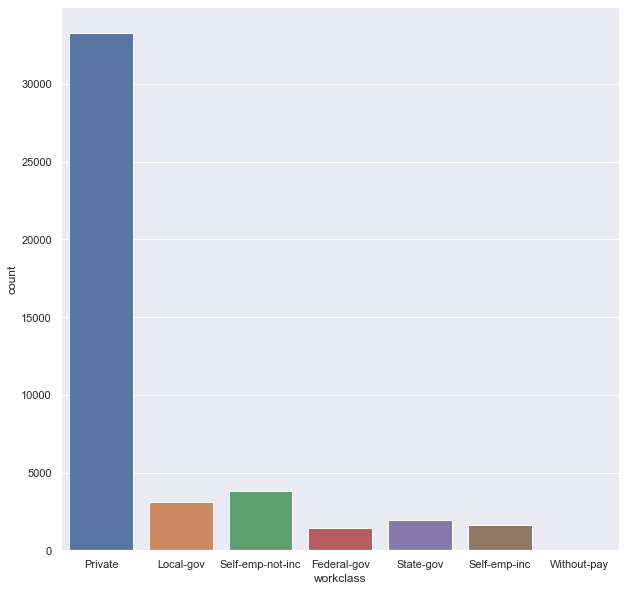

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(df['workclass']);

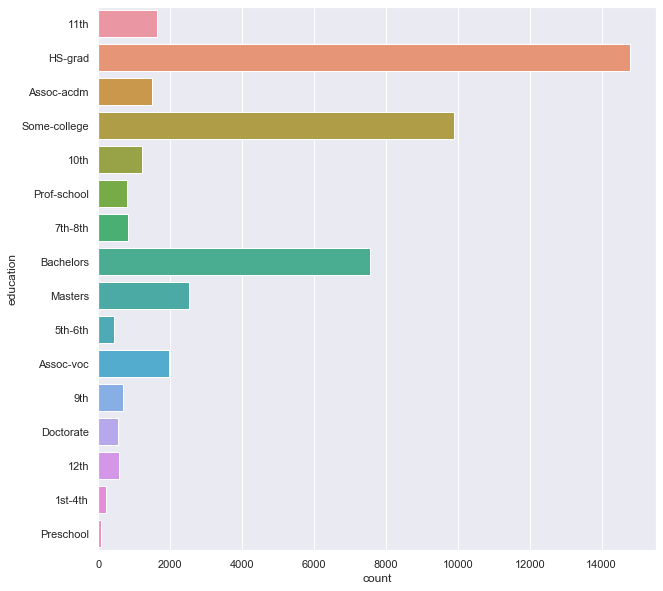

In [29]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = df['education']);

## Bivariate Analysis

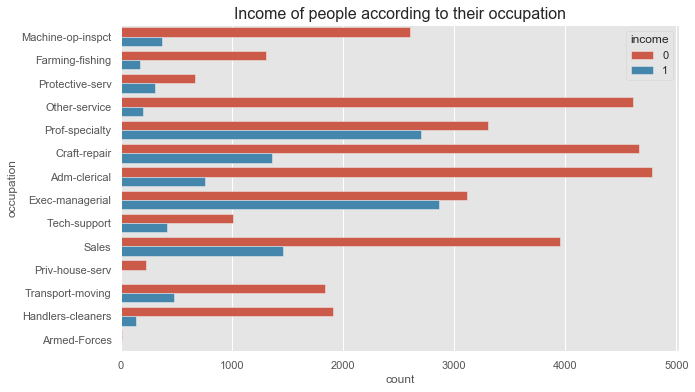

In [30]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = df['occupation'], hue = df['income'])
plt.show();

Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality. Now, encoding the occupation by frequency of the values in the column.

In [31]:
occupation_enc = (df.groupby('occupation').size()) / len(df)
print(occupation_enc)

df['occupation_enc'] = df['occupation'].apply(lambda x : occupation_enc[x])
df['occupation_enc'].head(3)

occupation
Adm-clerical         0.122507
Armed-Forces         0.000310
Craft-repair         0.133121
Exec-managerial      0.132325
Farming-fishing      0.032727
Handlers-cleaners    0.045243
Machine-op-inspct    0.065676
Other-service        0.106320
Priv-house-serv      0.005130
Prof-specialty       0.132856
Protective-serv      0.021582
Sales                0.119588
Tech-support         0.031401
Transport-moving     0.051214
dtype: float64


0    0.065676
1    0.032727
2    0.021582
Name: occupation_enc, dtype: float64

### 'Native_country':
* We are checking for the salary on people in USA and outside USA, so , we will convert all the values where country is not USA to 'non-usa'. This way, we can encode the values by one-hot encoding without increasing the curse of dimensionality.

In [32]:
df['native-country'].loc[df['native-country'] == 'United-States'] = 'usa'
df['native-country'].loc[df['native-country'] != 'usa'] = 'non_usa'
df['native-country'].value_counts()

usa        41292
non_usa     3930
Name: native-country, dtype: int64

In [33]:
plt.style.use('seaborn-pastel')


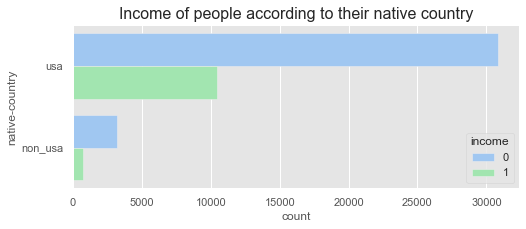

In [34]:
plt.figure(figsize = (8,3))
plt.title("Income of people according to their native country", fontsize = 16)
sns.countplot(y = df['native-country'], hue = df['income'])
plt.show()

Majority of people with higher income belong to the USA. We also have more number of people from USA then any other country combined in this dataset. Encoding this feature using one hot encoding.

In [35]:
df['country_enc'] = df['native-country'].map({'usa' : 1, 'non_usa' : 0})
df.drop(['native-country'], axis = 1, inplace = True)

In [36]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,occupation_enc,country_enc
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.065676,1
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.032727,1
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.021582,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.065676,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,0,0.106320,1


### 'Sex': 
Similarly, encoding the sex using one hot encoding.



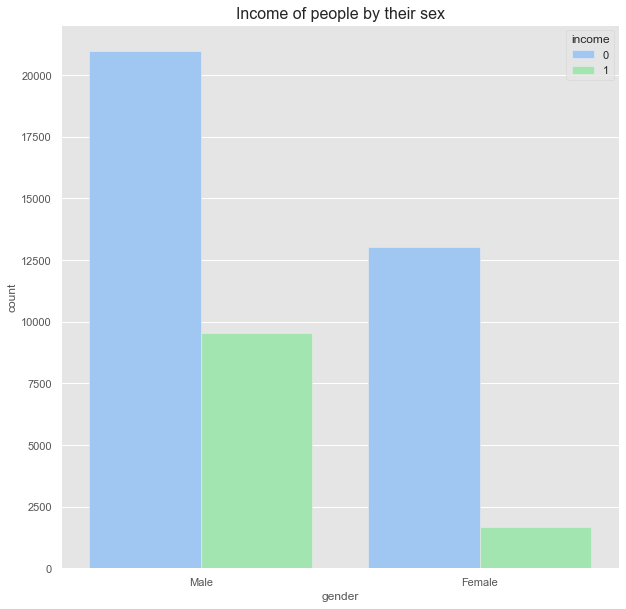

In [37]:
plt.title("Income of people by their sex", fontsize = 16)
sns.countplot(x = df['gender'], hue = df['income'])
plt.show();

We can see that male have more salary than female. Also in the dataset, the number of men are more than women. Encoding this feature with one hot encoding.

In [38]:
df['sex_enc'] = df['gender'].map({'Male' : 1, 'Female' : 0})
df.drop(['gender'], axis = 1, inplace = True)

### 'Marital_status': 
    Looking at the iincome of people according to their marital status.



In [39]:
plt.style.use('default')


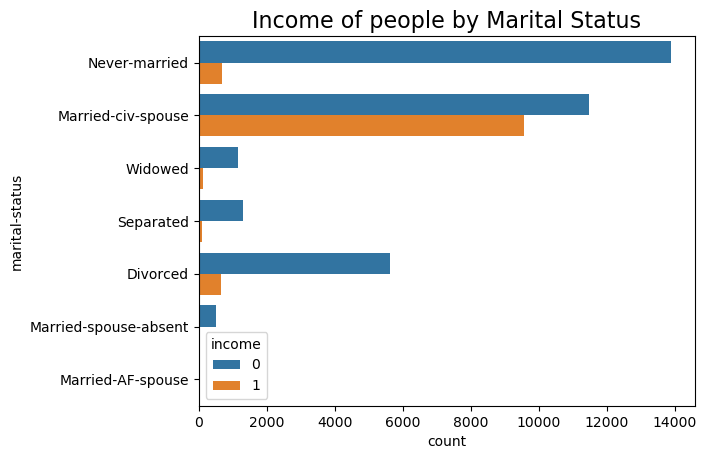

In [40]:
plt.title("Income of people by Marital Status", fontsize = 16)
sns.countplot(y = df['marital-status'], hue = df['income'])
plt.show();

Married people have a higher income as compared to others. Encoding the feature



In [41]:
marital_status_enc = (df.groupby('marital-status').size()) / len(df)
print(marital_status_enc)

df['marital_status_enc'] = df['marital-status'].apply(lambda x : marital_status_enc[x])
df['marital_status_enc'].head(3)

marital-status
Divorced                 0.139246
Married-AF-spouse        0.000708
Married-civ-spouse       0.465592
Married-spouse-absent    0.012206
Never-married            0.322807
Separated                0.031202
Widowed                  0.028238
dtype: float64


0    0.322807
1    0.465592
2    0.465592
Name: marital_status_enc, dtype: float64

### 'Race' and 'Relationship'



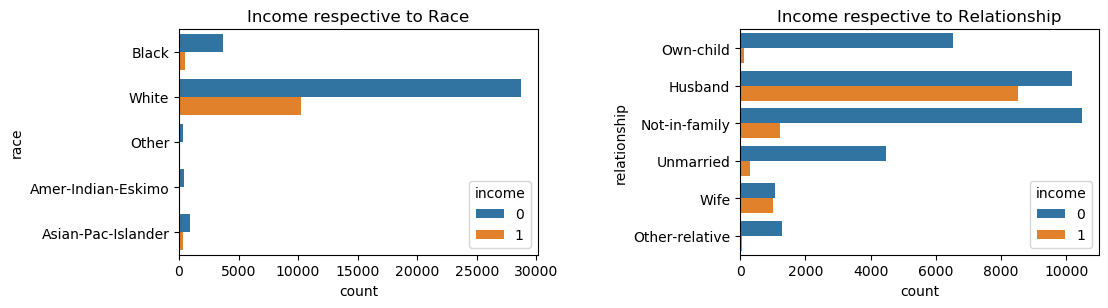

In [42]:
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.countplot(y = df['race'], hue = df['income'])
plt.title("Income respective to Race", fontsize = 12)

plt.subplot(1, 2, 2)
sns.countplot(y = df['relationship'], hue = df['income'])
plt.title("Income respective to Relationship", fontsize = 12)

plt.tight_layout(pad = 4)
plt.show()

White people have a higher salary as compared to other races. Similarly, husband in the family have a higher salary as compared to other relationship in the family. Encoding both these columns

In [43]:
race_enc = (df.groupby('race').size()) / len(df)
print(race_enc,'\n')
df['race_enc'] = df['race'].apply(lambda x : race_enc[x])

relationship_enc = (df.groupby('relationship').size()) / len(df)
print(relationship_enc)
df['relationship_enc'] = df['relationship'].apply(lambda x : relationship_enc[x])

race
Amer-Indian-Eskimo    0.009619
Asian-Pac-Islander    0.028813
Black                 0.093494
Other                 0.007806
White                 0.860267
dtype: float64 

relationship
Husband           0.412764
Not-in-family     0.258768
Other-relative    0.029831
Own-child         0.146522
Unmarried         0.105878
Wife              0.046239
dtype: float64


In [44]:
df.drop(['race', 'relationship'], axis = 1, inplace = True)
new_df = df.drop(['income'], axis = 1)
new_df['income'] = df['income']

In [45]:
new_df.head()

,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,25,Private,11th,Never-married,Machine-op-inspct,0,0,40,0.065676,1,1,0.322807,0.093494,0.146522,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,0,0,50,0.032727,1,1,0.465592,0.860267,0.412764,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,0,0,40,0.021582,1,1,0.465592,0.860267,0.412764,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,7688,0,40,0.065676,1,1,0.465592,0.093494,0.412764,1
5,34,Private,10th,Never-married,Other-service,0,0,30,0.106320,1,1,0.322807,0.860267,0.258768,0


In [46]:
new_df.shape

(45222, 15)

### Outliers:
We check if any outliers are present in the continous attributes of the dataset. We check it both by visualisations and the zscore for the continous columns.

In [47]:
plt.style.use('ggplot')

BoxPlots of the features:


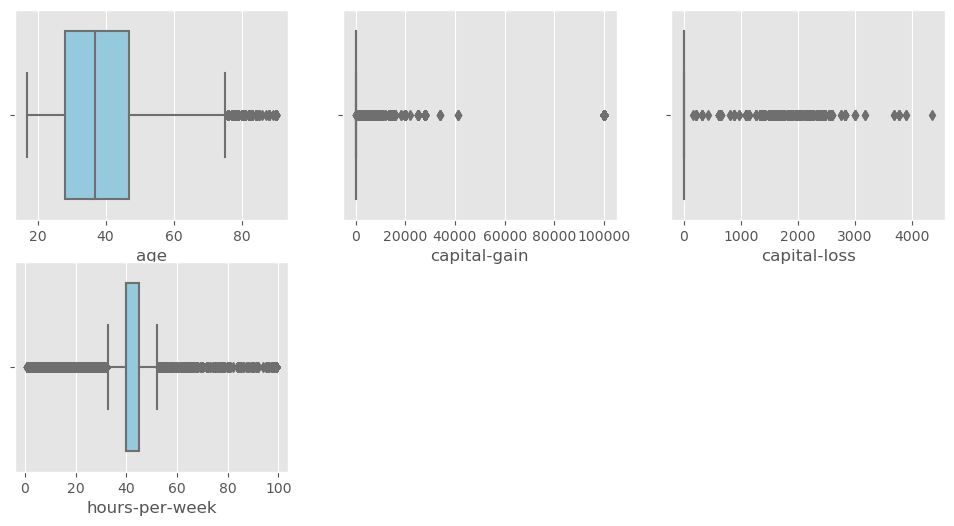

In [48]:
clist = ['age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(df[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

**Outliers are present** in the continous columns of the feature. We will check the z-score of the features and and clip them from the data.

In [49]:
from scipy.stats import zscore
zabs = np.abs(zscore(new_df.loc[:,'capital-gain':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_df = new_df[(zabs < 3).all(axis = 1)]
new_df

(2, 3013)


,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,25,Private,11th,Never-married,Machine-op-inspct,0,0,40,0.065676,1,1,0.322807,0.093494,0.146522,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,0,0,50,0.032727,1,1,0.465592,0.860267,0.412764,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,0,0,40,0.021582,1,1,0.465592,0.860267,0.412764,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,7688,0,40,0.065676,1,1,0.465592,0.093494,0.412764,1
5,34,Private,10th,Never-married,Other-service,0,0,30,0.106320,1,1,0.322807,0.860267,0.258768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,0,0,38,0.031401,1,0,0.465592,0.860267,0.046239,0
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,0,0,40,0.065676,1,1,0.465592,0.860267,0.412764,1
48839,58,Private,HS-grad,Widowed,Adm-clerical,0,0,40,0.122507,1,0,0.028238,0.860267,0.105878,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,0,0,20,0.122507,1,1,0.322807,0.860267,0.146522,0


WE have a total of 3013 outliers in the data. After removing the outliers, we have 42253 observations left.



### Correlation:
Checking the correlation between the features and target variable to see which of them columns are more related to target

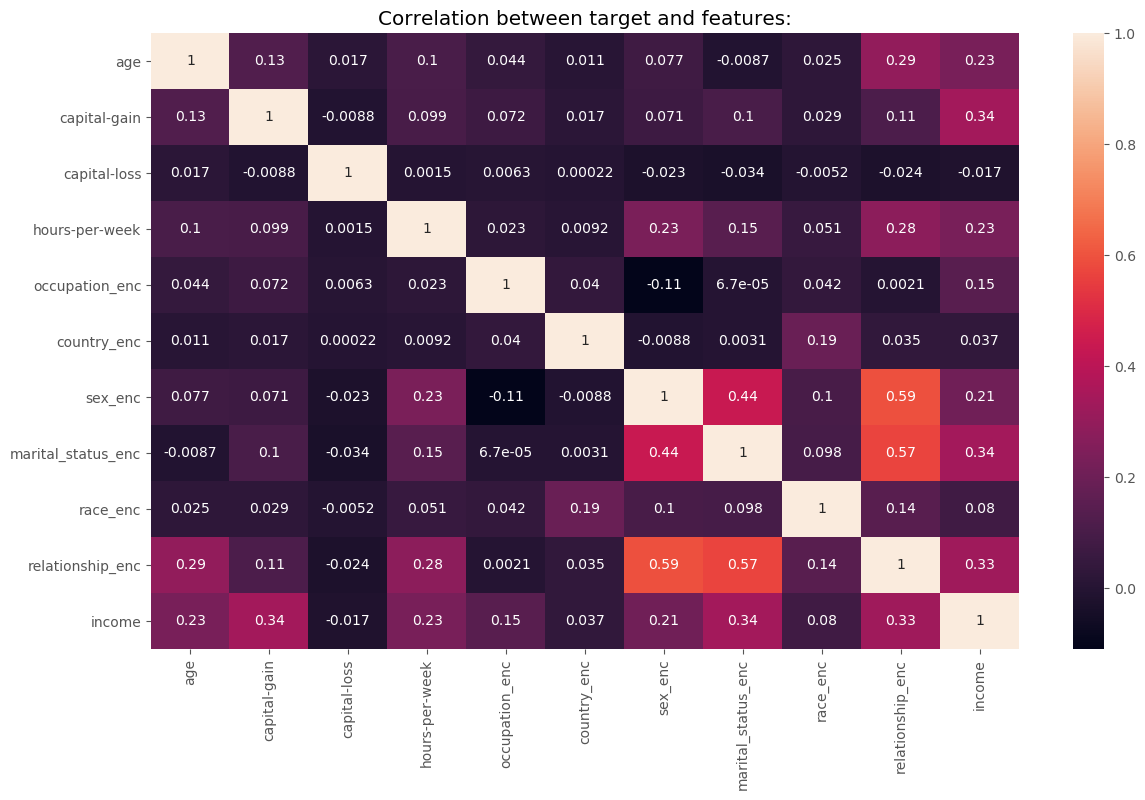

In [50]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(new_df.corr(), annot = True)
plt.show()

'Capital_gain', , 'Marital_status_enc', 'Relationship_enc' are most correlated to the Income of the observations.

## Scaling:
As we see that the values of attributes in the dataset vary largely, so it is important to scale the data. Using the Min-Max scaler in order to bring normalisation in the data

In [51]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_df.loc[:,'capital-gain':'hours-per-week'] = scale.fit_transform(new_df.loc[:,'capital-gain':'hours-per-week'])
new_df

,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,25,Private,11th,Never-married,Machine-op-inspct,0.00000,0.0,0.492958,0.065676,1,1,0.322807,0.093494,0.146522,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,0.00000,0.0,0.633803,0.032727,1,1,0.465592,0.860267,0.412764,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,0.00000,0.0,0.492958,0.021582,1,1,0.465592,0.860267,0.412764,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,0.34882,0.0,0.492958,0.065676,1,1,0.465592,0.093494,0.412764,1
5,34,Private,10th,Never-married,Other-service,0.00000,0.0,0.352113,0.106320,1,1,0.322807,0.860267,0.258768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,0.00000,0.0,0.464789,0.031401,1,0,0.465592,0.860267,0.046239,0
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,0.00000,0.0,0.492958,0.065676,1,1,0.465592,0.860267,0.412764,1
48839,58,Private,HS-grad,Widowed,Adm-clerical,0.00000,0.0,0.492958,0.122507,1,0,0.028238,0.860267,0.105878,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,0.00000,0.0,0.211268,0.122507,1,1,0.322807,0.860267,0.146522,0


### Data Imbalance:
If the data is imbalanced, it can cause the overfitting and bias in the odel prediction. So it is important to check and cure the data imbalance if present. We check the target variable to see if it is balanced or not.

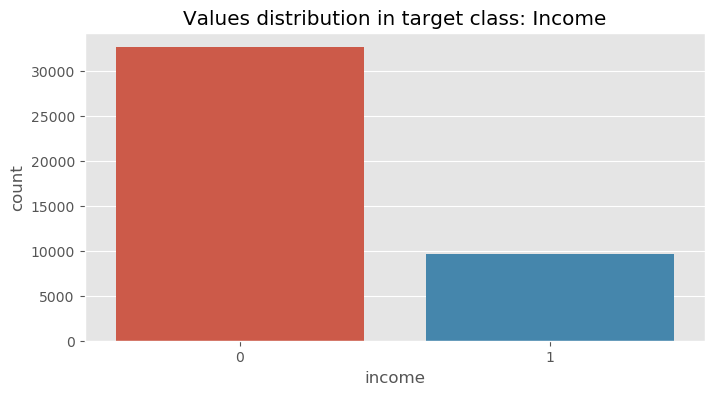

In [52]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_df, x = 'income')
plt.show()

As we can see that data is imbalanced. In order to remove the data imbalance, we use the **SMOTETomek class to create synthetic values using KNN algorithm.**

In [54]:
from imblearn.combine import SMOTETomek
x = new_df.loc[:,"capital-gain":"relationship_enc"]
y = new_df.loc[:,"income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

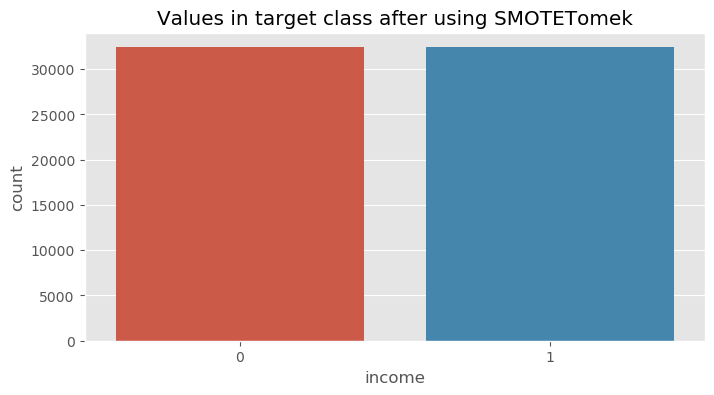

In [55]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show();

In [58]:
df

,age,workclass,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week,income,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc
0,25,Private,11th,Never-married,Machine-op-inspct,0,0,40,0,0.065676,1,1,0.322807,0.093494,0.146522
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,0,0,50,0,0.032727,1,1,0.465592,0.860267,0.412764
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,0,0,40,1,0.021582,1,1,0.465592,0.860267,0.412764
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,7688,0,40,1,0.065676,1,1,0.465592,0.093494,0.412764
5,34,Private,10th,Never-married,Other-service,0,0,30,0,0.106320,1,1,0.322807,0.860267,0.258768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,0,0,38,0,0.031401,1,0,0.465592,0.860267,0.046239
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,0,0,40,1,0.065676,1,1,0.465592,0.860267,0.412764
48839,58,Private,HS-grad,Widowed,Adm-clerical,0,0,40,0,0.122507,1,0,0.028238,0.860267,0.105878
48840,22,Private,HS-grad,Never-married,Adm-clerical,0,0,20,0,0.122507,1,1,0.322807,0.860267,0.146522


In [61]:
def cross_tab(obs1=[]):
    observed=pd.crosstab(obs1,df['income'])
    val=stats.chi2_contingency(observed)
    return(val[1])

category=df.columns[df.dtypes!=object].tolist()[5:]
alpha=0.01
count=0
features=[]
for i in category:
    p_value=cross_tab(df[i])
    if p_value<=alpha:
        count+=1
        features.append(i)

In [64]:
categorical_cols = df.columns[df.dtypes==object].tolist()
df=pd.get_dummies(df,columns=categorical_cols)

from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
mms = MinMaxScaler()
min_max_scaled_columns = mms.fit_transform(df[columns_to_scale])

df['age'],df['capital-gain'],df['capital-loss'],df['hours-per-week']=min_max_scaled_columns[:,0],min_max_scaled_columns[:,1],min_max_scaled_columns[:,2],min_max_scaled_columns[:,3]

## ML models

## Logestic Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,accuracy_score


In [76]:
from sklearn.linear_model import LogisticRegression

x = df.drop('income', axis=1)
y = df['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


smk = SMOTETomek()

X_train, Y_train = smk.fit_resample(x_train, y_train)

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(x_test)



In [77]:
def train_print(clf,x_test,y_test):
    predictions = clf.predict(x_test)
    print('Precision report:\nprecision \t\t\t recall \t\t\t f-score \t\t\t support\n',
          precision_recall_fscore_support(y_test, predictions)[0],'\t',
          precision_recall_fscore_support(y_test, predictions)[1],
          '\t',precision_recall_fscore_support(y_test, predictions)[2],'\t',
          precision_recall_fscore_support(y_test, predictions)[3],'\n')
    print('Confusion matrix:\n',confusion_matrix(y_test, predictions),'\n')
    print('Accuracy score:',accuracy_score(y_test, predictions)*100,'\n')

In [80]:
train_print(logmodel,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.93621045 0.57788789] 	 [0.79979436 0.83415288] 	 [0.86264259 0.68276619] 	 [6808 2237] 

Confusion matrix:
 [[5445 1363]
 [ 371 1866]] 

Accuracy score: 80.82918739635157 



In [81]:
# predict probabilities
lr_probs = logmodel.predict_proba(x_test)
#print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#print(lr_probs)
ns_probs = [0 for _ in range(len(y_test))]
#print(ns_probs)

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random Prediction: ROC AUC=0.500
Logistic: ROC AUC=0.901


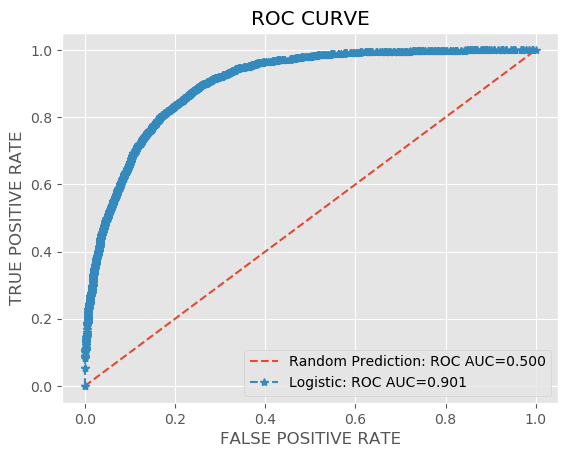

In [83]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

## Decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
smk = SMOTETomek()

X_train, Y_train = smk.fit_resample(x_train, y_train)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

train_print(clf,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.87410731 0.75614367] 	 [0.93671507 0.59259259] 	 [0.90432888 0.66445183] 	 [10192  3375] 

Confusion matrix:
 [[9547  645]
 [1375 2000]] 

Accuracy score: 85.11093093535786 



In [87]:
# predict probabilities
dt_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
dt_probs1 = dt_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Deciison Tree: ROC AUC=%.3f' % (dt_auc))

Random Prediction: ROC AUC=0.500
Deciison Tree: ROC AUC=0.897


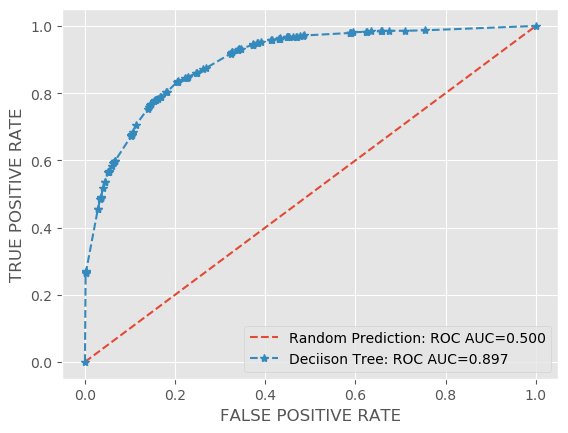

In [88]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

## Naive bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()

x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

smk = SMOTETomek()

X_train, Y_train = smk.fit_resample(x_train, y_train)


# Train the model using the training sets
gnb = model.fit(x_train,y_train)

train_print(gnb,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.94286279 0.48858791] 	 [0.70049941 0.87080912] 	 [0.8038092  0.62596401] 	 [6808 2237] 

Confusion matrix:
 [[4769 2039]
 [ 289 1948]] 

Accuracy score: 74.26202321724709 



Random Prediction: ROC AUC=0.500
Naive Bayes: ROC AUC=0.858


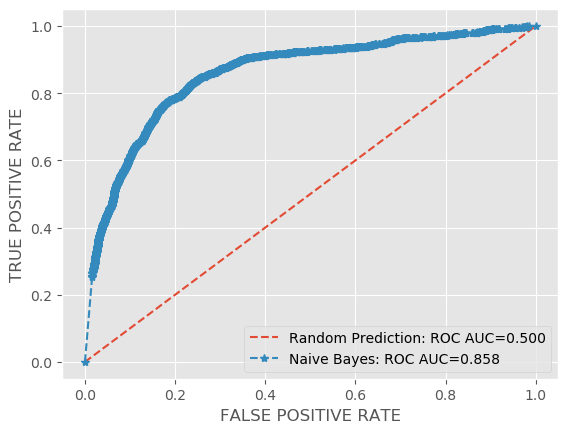

In [90]:
# predict probabilities
nb_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(min_samples_split=30)

x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


smk = SMOTETomek()

X_train, Y_train = smk.fit_resample(x_train, y_train)


# Train the model using the training sets
rf.fit(x_train,y_train)

train_print(rf,x_test,y_test)

Precision report:
precision 			 recall 			 f-score 			 support
 [0.88559204 0.76171875] 	 [0.93416405 0.63555556] 	 [0.90922981 0.69294137] 	 [10192  3375] 

Confusion matrix:
 [[9521  671]
 [1230 2145]] 

Accuracy score: 85.98805926144321 



Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.914


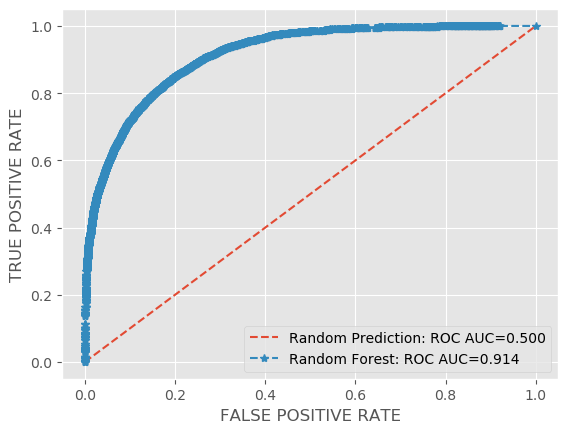

In [92]:
# predict probabilities
rf_probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

## Comparing all the models

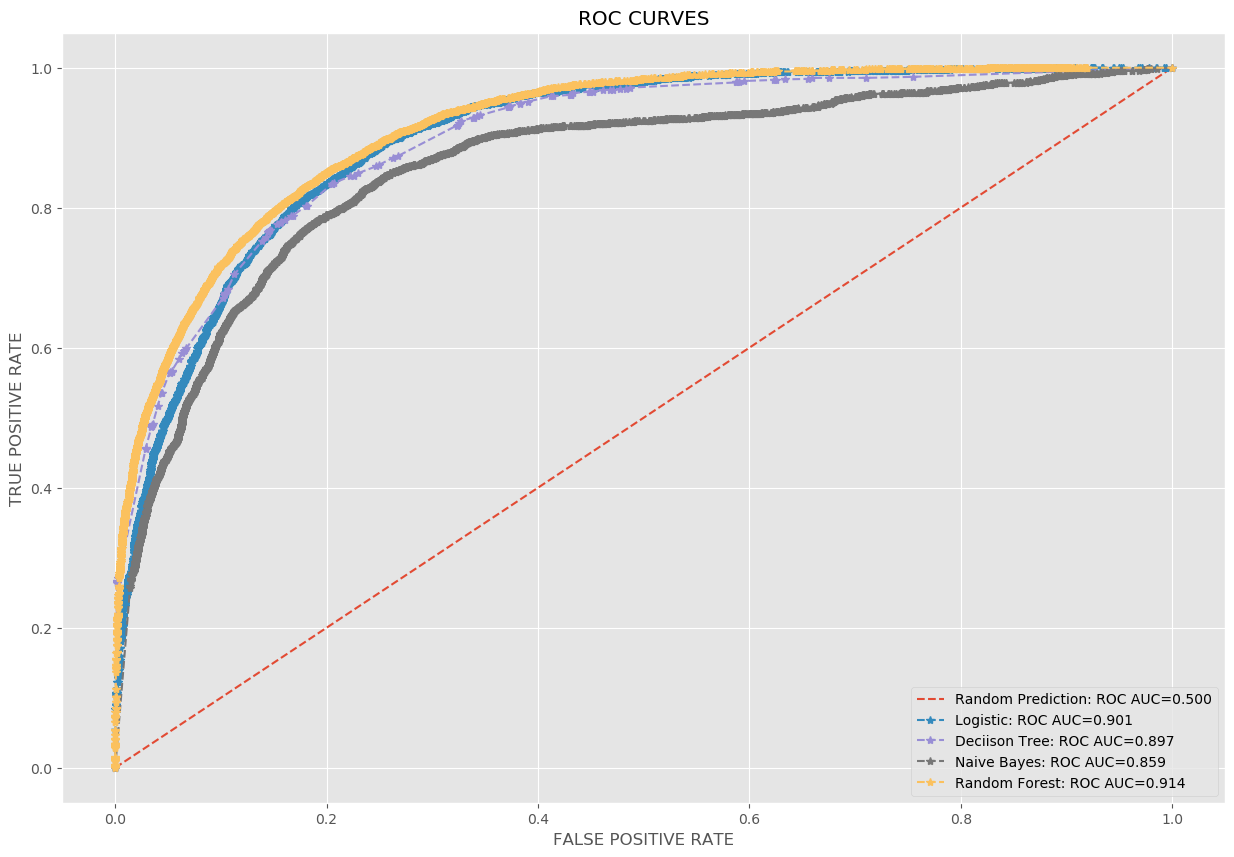

In [94]:
plt.figure(figsize=(15,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
# show the legend
plt.legend()
# show the plot
plt.show()

**Random Forest performs the best with area of 0.914 under the curve.**

# THANK YOU